<a href="https://colab.research.google.com/github/estefanialopeez/Actividad6/blob/main/Actividad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%pip install funpymodeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from funpymodeling.exploratory import freq_tbl

In [ ]:
#Cargar el archivo
#from google.colab import files
#files.upload()

In [ ]:
#Leemos el archivo y lo asignamos a un dataframe
#df = pd.read_csv("TrainingDataComplete.csv",index_col="Id")
df = pd.read_csv("BD_Socio formador (TrainingDataComplete).csv",index_col="Id")

#Visualizamos las primeras 5 filas del frame
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# **Preporcesamiento**

## 1. Valores Nulos

In [ ]:
#Identificación de valores nulos en el DataFrame

#Valores nulos por columna
print("Datos nulos:")
print()
print(df.isnull().sum())
print()

nulos=df.isnull().sum().sum()
print('EL DataFrame cuanta con', nulos, 'valores nulos')

Datos nulos:

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

EL DataFrame cuanta con 0 valores nulos


**Análisis**
- Las columnas del DataFrame no contienen valores nulos, por lo tanto, procederemos a realizar el análisis de outliers en las variables numéricas y, en caso de encontrar alguno, procederemos a eliminarlos.

## 2. Outliers

<Figure size 2500x1000 with 0 Axes>

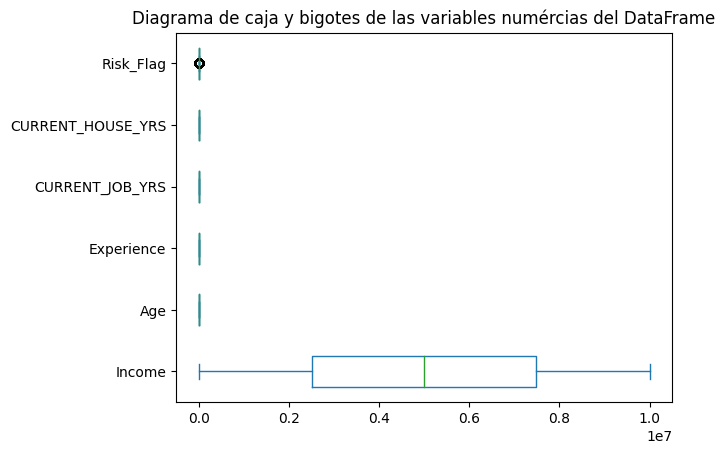

In [ ]:
#Boxplot de las variables numércias del DataFrame para visuaizar los valores atípicos
fig = plt.figure(figsize=(25,10))
df.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes de las variables numércias del DataFrame")
plt.show()

In [ ]:
#Análisis de la variable "Risk_Flag"
df["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

**Análisis**
- En el diagrama de caja y bigotes de las variables numéricas del DataFrame, la variable "Risk_Flag" es la única que muestra valores atípicos. Sin embargo, al realizar un análisis de la variable, podemos observar que se trata de una variable binaria, ya que solo contiene los valores 0 y 1. Por lo tanto, no la tendremos en cuenta para la eliminación de valores atípicos. En resumen, podemos concluir que las variables numéricas en el DataFrame no presentan valores atípicos.

#**Extracción de de caracteristicas**

- De las columnas (Age, Experience, Married/Single, House_Ownership, Profession , CITY, CURRENT_JOB_YRS , CURRENT_HOUSE_YRS, Risk_flag)

## Columna: **Age**

- De tipo numérica

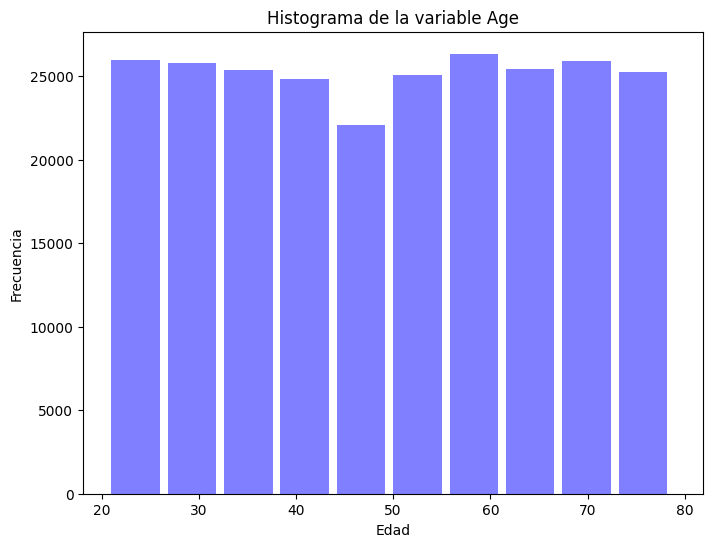

In [ ]:
#Histograma
plt.figure(figsize=(8, 6))
plt.hist(df["Age"],width=5,color = "blue", alpha=0.5)
plt.title("Histograma de la variable Age")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

Tabla de Frecuencia para la columna'Age':

    Edad  Frecuencia
0     27        5197
1     66        5092
2     48        4967
3     33        4921
4     41        4827
5     45        4806
6     54        4785
7     68        4772
8     35        4643
9     50        4624
10    69        4617
11    76        4585
12    55        4563
13    25        4543
14    72        4533
15    79        4505
16    60        4504
17    59        4498
18    53        4490
19    47        4483
20    30        4468
21    78        4455
22    22        4430
23    34        4414
24    57        4394
25    58        4368
26    56        4344
27    24        4326
28    23        4322
29    62        4311
30    31        4257
31    70        4251
32    61        4235
33    40        4233
34    43        4206
35    21        4205
36    49        4203
37    26        4156
38    37        4153
39    71        4150
40    42        4134
41    64        4132
42    29        4109
43    67        3995
44    65    

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Edad')

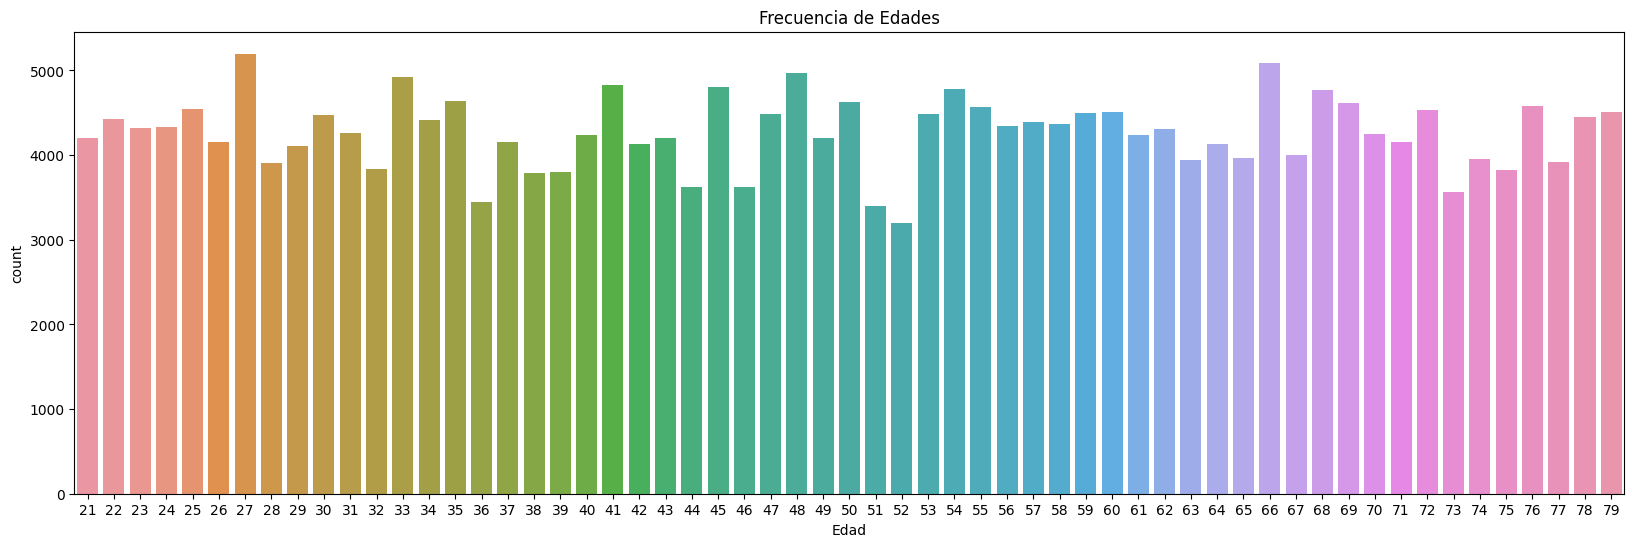

In [ ]:
# Calcular la frecuencia de valores para la columna "Age"
age_frequency = df['Age'].value_counts().reset_index()
age_frequency.columns = ['Edad', 'Frecuencia']

# Mostrar las tablas de frecuencia
print("Tabla de Frecuencia para la columna'Age':")
print()
print(age_frequency)

#Gráfica de barras
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Age')
plt.title('Frecuencia de Edades')
plt.xlabel('Edad')

## Columna: **Experience**

- De tipo numérica

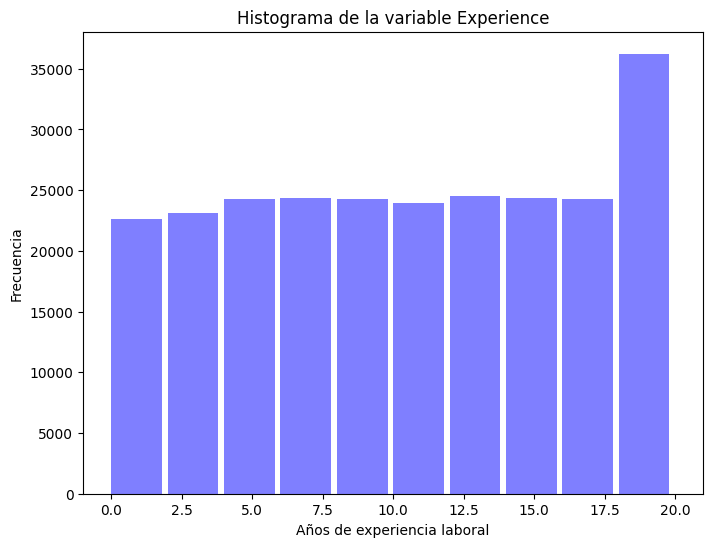

In [ ]:
#Histograma
plt.figure(figsize=(8, 6))
plt.hist(df["Experience"],width=1.8,color = "blue", alpha=0.5)
plt.title("Histograma de la variable Experience")
plt.xlabel("Años de experiencia laboral")
plt.ylabel("Frecuencia")
plt.show()

Tabla de Frecuencia para la columna 'Experience':
    Experiencia  Frecuencia
0             6       13158
1             9       12936
2            12       12800
3            18       12601
4            10       12503
5             5       12441
6            14       12369
7            19       12287
8            17       12131
9            16       12106
10            3       12069
11           15       11993
12            4       11807
13           13       11713
14            1       11575
15           11       11449
16           20       11350
17            8       11350
18            7       11232
19            2       11087
20            0       11043


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


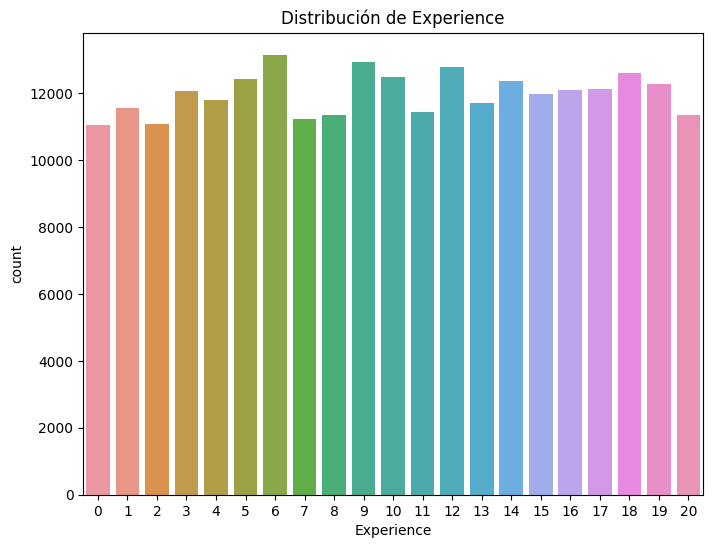

In [ ]:
# Calcular la frecuencia de valores para la columna "Age"
age_frequency = df['Experience'].value_counts().reset_index()
age_frequency.columns = ['Experiencia', 'Frecuencia']

# Mostrar las tablas de frecuencia
print("Tabla de Frecuencia para la columna 'Experience':")
print(age_frequency)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Experience')
plt.title('Distribución de Experience')
plt.show()

## Columna: **Married/Single**

- De tipo categórica (Binaria)

Tabla de Frecuencia para la columna 'Married/Single':
                frequency  percentage  cumulative_perc
Married/Single                                        
single             226272    0.897905         0.897905
married             25728    0.102095         1.000000 



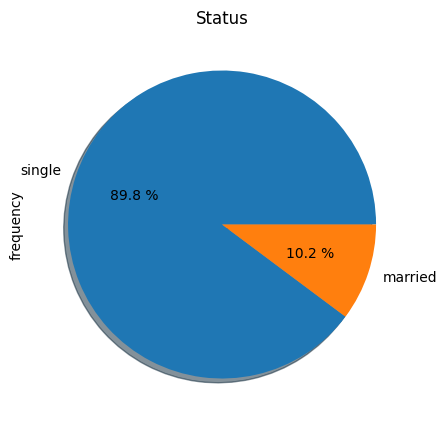

In [ ]:
#Married/single
tablelMS= freq_tbl(df['Married/Single'])
tablelM_S = tablelMS.set_index('Married/Single')

print("Tabla de Frecuencia para la columna 'Married/Single':")
print(tablelM_S,"\n")

#Gráfico de pie
tablelM_S["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title("Status")
plt.show()

## Columna: **House_Ownership**

- De tipo categórica

Tabla de Frecuencia para la columna 'House_Ownership':
                 frequency  percentage  cumulative_perc
House_Ownership                                        
rented              231898    0.920230         0.920230
owned                12918    0.051262         0.971492
norent_noown          7184    0.028508         1.000000 



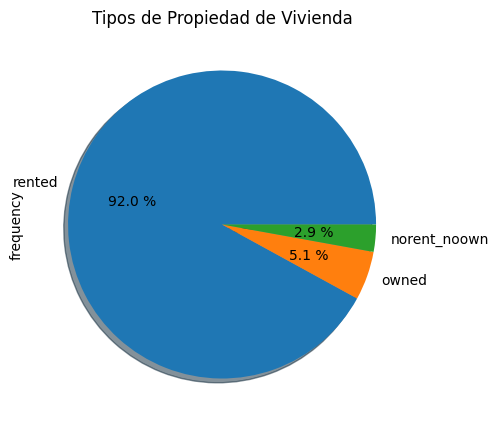

In [ ]:
# House_Ownership
tablelHO= freq_tbl(df['House_Ownership'])
tablelH_O = tablelHO.set_index('House_Ownership')

print("Tabla de Frecuencia para la columna 'House_Ownership':")
print(tablelH_O,'\n')

#Gráfico de pie
tablelH_O["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
plt.title('Tipos de Propiedad de Vivienda')
plt.show()

## Columna: **Profession**

- De tipo categórica

Tabla de Frecuencia para la columna 'Profession':
                            frequency  percentage  cumulative_perc
Profession                                                        
Physician                        5957    0.023639         0.023639
Statistician                     5806    0.023040         0.046679
Web_designer                     5397    0.021417         0.068095
Psychologist                     5390    0.021389         0.089484
Computer_hardware_engineer       5372    0.021317         0.110802
Drafter                          5359    0.021266         0.132067
Magistrate                       5357    0.021258         0.153325
Fashion_Designer                 5304    0.021048         0.174373
Air_traffic_controller           5281    0.020956         0.195329
Comedian                         5259    0.020869         0.216198
Industrial_Engineer              5250    0.020833         0.237032
Mechanical_engineer              5217    0.020702         0.257734
Chemical_eng

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


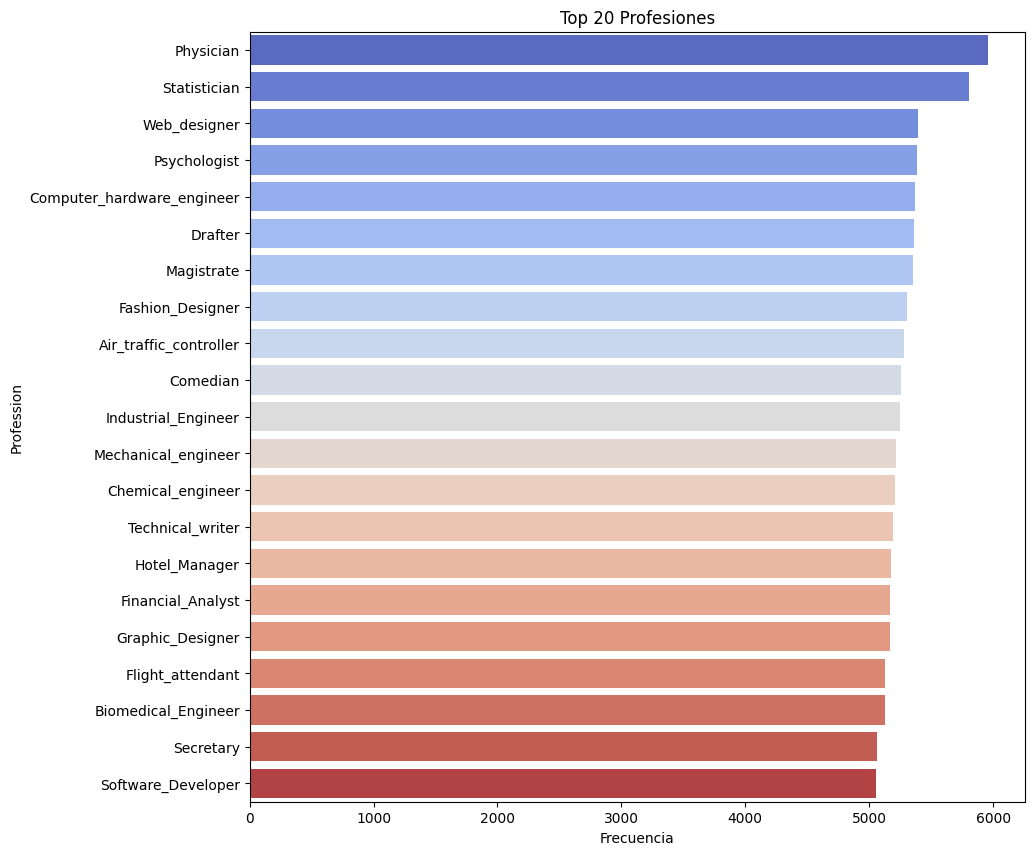

In [ ]:
# Profession
tablelP= freq_tbl(df['Profession']) #Tabla de frecuencia
FiltroP =tablelP[tablelP['frequency']>(5050)] #Filtro para quedarnos unicamente con las 20 más altas
filtro_indexP=FiltroP.set_index('Profession') #Reseteamos los índices

print("Tabla de Frecuencia para la columna 'Profession':")
print(filtro_indexP,'\n')

plt.figure(figsize=(10, 10))
sns.barplot(x=filtro_indexP["frequency"].values, y=filtro_indexP.index, palette='coolwarm')
plt.title('Top 20 Profesiones')
plt.xlabel('Frecuencia')
plt.xticks()
plt.show()

## Columna: **CITY**

- De tipo categórica

Tabla de Frecuencia para la columna 'CITY':
               frequency  percentage  cumulative_perc
CITY                                                 
Vijayanagaram       1259    0.004996         0.004996
Bhopal              1208    0.004794         0.009790
Bulandshahr         1185    0.004702         0.014492
Saharsa[29]         1180    0.004683         0.019175
Vijayawada          1172    0.004651         0.023825
Srinagar            1136    0.004508         0.028333
Indore              1130    0.004484         0.032817
New_Delhi           1098    0.004357         0.037175
Hajipur[31]         1098    0.004357         0.041532
Satara              1096    0.004349         0.045881
Navi_Mumbai         1084    0.004302         0.050183
Jorhat              1079    0.004282         0.054464
Ongole              1067    0.004234         0.058698
Bellary             1065    0.004226         0.062925
Giridih             1064    0.004222         0.067147
Erode[17]           1064    0.004222  

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


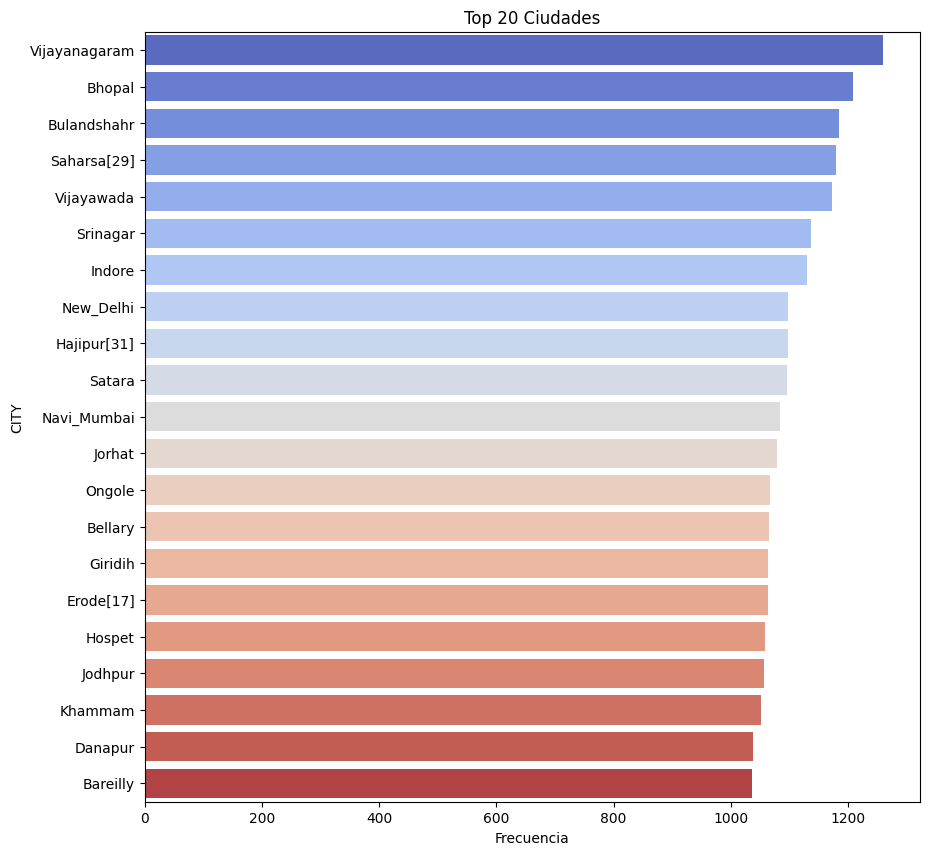

In [ ]:
# City
tablelC= freq_tbl(df['CITY'])
FiltroC =tablelC[tablelC['frequency']>(1035)]
filtro_indexC=FiltroC.set_index('CITY')

print("Tabla de Frecuencia para la columna 'CITY':")
print(filtro_indexC,'\n')

plt.figure(figsize=(10, 10))
sns.barplot(x=filtro_indexC["frequency"].values, y=filtro_indexC.index, palette='coolwarm')
plt.title('Top 20 Ciudades')
plt.xlabel('Frecuencia')
plt.xticks()
plt.show()

## Columna: **CURRENT_JOB_YRS**

- De tipo numérica

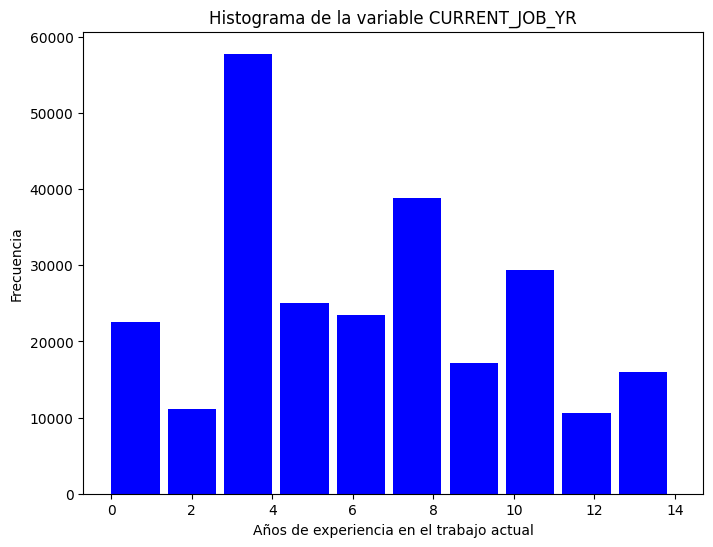

In [ ]:
#Histograma
plt.figure(figsize=(8, 6))
plt.hist(df["CURRENT_JOB_YRS"],width=1.2,color = "blue")
plt.title("Histograma de la variable CURRENT_JOB_YR")
plt.xlabel("Años de experiencia en el trabajo actual")
plt.ylabel("Frecuencia")
plt.show()


Tabla de Frecuencia para 'CURRENT_JOB_YRS':
    Años Actuales en el Trabajo  Frecuencia
0                             3       29460
1                             4       28339
2                             5       25091
3                             6       23491
4                             7       19925
5                             8       18874
6                             9       17132
7                            10       15768
8                            11       13595
9                             1       11575
10                            2       11087
11                            0       11043
12                           12       10605
13                           13        9099
14                           14        6916


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


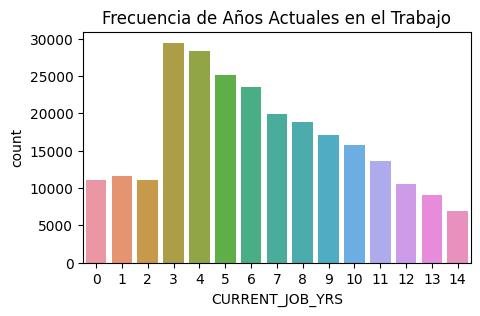

In [ ]:
#CURRENT_JOB_YRS
# Calcular la frecuencia de valores para la columna "CURRENT_JOB_YRS"
job_years_frequency = df['CURRENT_JOB_YRS'].value_counts().reset_index()
job_years_frequency.columns = ['Años Actuales en el Trabajo', 'Frecuencia']

print("\nTabla de Frecuencia para 'CURRENT_JOB_YRS':")
print(job_years_frequency)

plt.figure(figsize=(5, 3))
plt.title('Frecuencia de Años Actuales en el Trabajo')
sns.countplot(data=df, x='CURRENT_JOB_YRS')
plt.xticks()
plt.show()

## Columna: **CURRENT_HOUSE_YRS**

- De tipo numérica

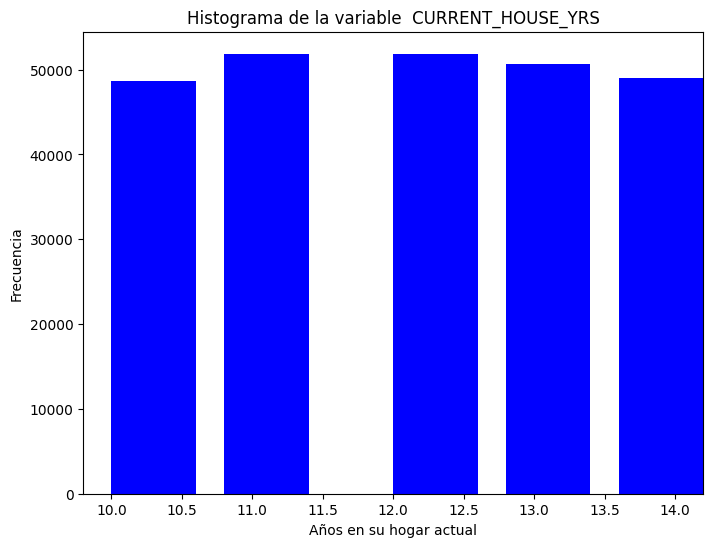

In [ ]:
#Histograma
plt.figure(figsize=(8, 6))
plt.hist(df["CURRENT_HOUSE_YRS"],width=0.6,color = "blue")
plt.title("Histograma de la variable  CURRENT_HOUSE_YRS")
plt.xlabel("Años en su hogar actual")
plt.ylabel("Frecuencia")
plt.show()

Tabla de Frecuencia para la columna'CURRENT_HOUSE_YRS':
   Años actuales en la casa  Frecuencia
0                        11       51873
1                        12       51791
2                        13       50659
3                        14       49003
4                        10       48674


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


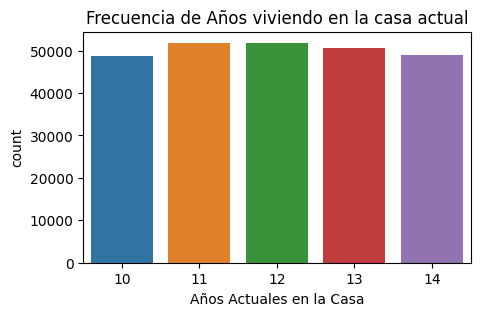

In [ ]:
# Calcular la frecuencia de valores para la columna "CURRENT_HOUSE_YRS"
CURRENT_HOUSE_YRS_frequency = df['CURRENT_HOUSE_YRS'].value_counts().reset_index()
CURRENT_HOUSE_YRS_frequency.columns = ['Años actuales en la casa', 'Frecuencia']

# Mostrar las tablas de frecuencia
print("Tabla de Frecuencia para la columna'CURRENT_HOUSE_YRS':")
print(CURRENT_HOUSE_YRS_frequency)

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='CURRENT_HOUSE_YRS')
plt.title('Frecuencia de Años viviendo en la casa actual')
plt.xlabel('Años Actuales en la Casa')
plt.xticks()
plt.show()


## Columna: **Risk_Flag**

- De tipo numérica (binaria)

Tabla de Frecuencia para la columna'Risk_Flag':
   Estatus(0-1)  Frecuencia
0             0      221004
1             1       30996


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Risk_flag')

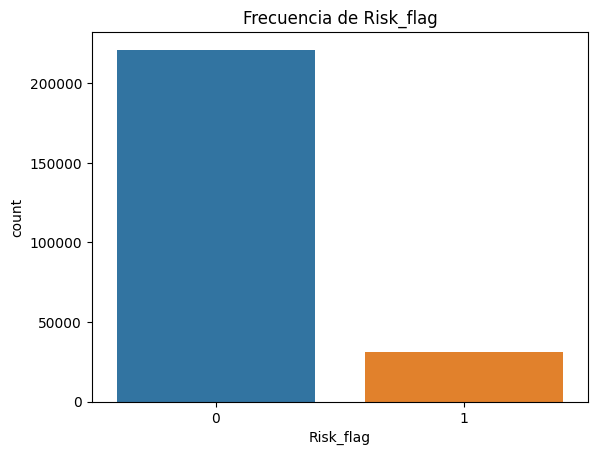

In [ ]:
# Risk_flag
# Calcular la frecuencia de valores para la columna "Risk_Flag"
Risk_Flag_frequency = df['Risk_Flag'].value_counts().reset_index()
Risk_Flag_frequency.columns = ['Estatus(0-1)', 'Frecuencia']

# Mostrar las tablas de frecuencia
print("Tabla de Frecuencia para la columna'Risk_Flag':")
print(Risk_Flag_frequency)

sns.countplot(data=df, x='Risk_Flag')
plt.title('Frecuencia de Risk_flag')
plt.xlabel('Risk_flag')

#**Análisis de correlación entre las variables numericas del DataFrame**

- Mediante mapa de calor, Obtener los 3 mejores modelos de regresion lineal simple

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


In [ ]:
df = df.iloc[:,[0,1,2,9,10,11]]
df.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,
1,1303834,23,3,3,13,0
2,7574516,40,10,9,13,0
3,3991815,66,4,4,10,0
4,6256451,41,2,2,12,1
5,5768871,47,11,3,14,1


In [ ]:
Corr_Factors = df.corr()
Corr_Factors

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


In [ ]:
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,0.000652,0.006422,0.007045,0.002397,0.003091
Age,0.000652,1.000000,0.001118,0.002154,0.020134,0.021809
Experience,0.006422,0.001118,1.000000,0.646098,0.019309,0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,0.016942
CURRENT_HOUSE_YRS,0.002397,0.020134,0.019309,0.005372,1.000000,0.004375
Risk_Flag,0.003091,0.021809,0.034523,0.016942,0.004375,1.000000


<Axes: >

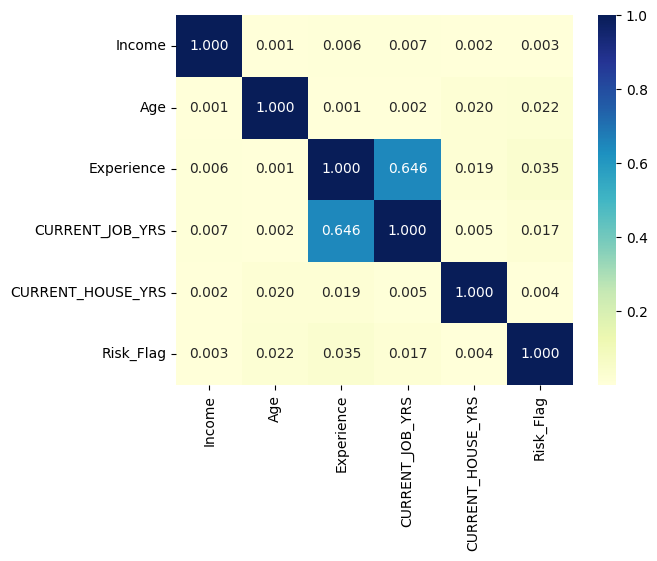

In [ ]:
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot = True, fmt = ".3f")
Heat_Map

In [ ]:
Vars_Indep = df[['CURRENT_JOB_YRS']]
Var_Dep = df['Experience']

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
model.fit(X=Vars_Indep, y=Var_Dep)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CURRENT_JOB_YRS'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.06339513]),
 'rank_': 1,
 'singular_': array([1830.80244488]),
 'intercept_': 3.3490225813747347}

**Modelo matematico: 1.06339513x + 3.3490225813747347**

In [ ]:
y_pred = model.predict(X=df[['CURRENT_JOB_YRS']])
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([ 6.53920797, 12.91957873,  7.60260309, ..., 10.79278848,
        3.34902258, 10.79278848])

In [ ]:
df.insert(0,'Predicciones', y_pred)
df

,Predicciones,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,
1,6.539208,1303834,23,3,3,13,0
2,12.919579,7574516,40,10,9,13,0
3,7.602603,3991815,66,4,4,10,0
4,5.475813,6256451,41,2,2,12,1
5,6.539208,5768871,47,11,3,14,1
...,...,...,...,...,...,...,...
251996,9.729393,8154883,43,13,6,11,0
251997,9.729393,2843572,26,10,6,11,0
251998,10.792788,4522448,46,7,7,12,0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='Experience'>

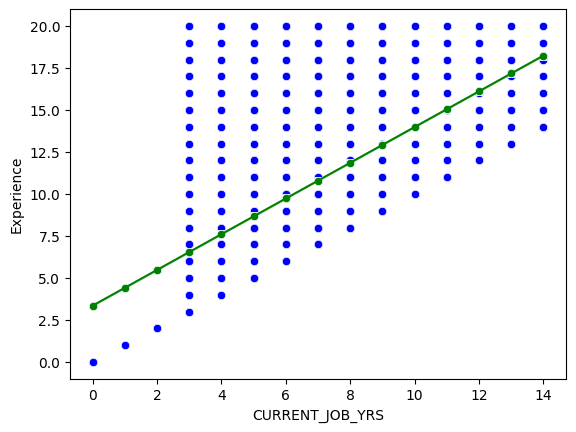

In [ ]:
sns.scatterplot(x='CURRENT_JOB_YRS', y='Experience', color='blue', data=df)
sns.scatterplot(x='CURRENT_JOB_YRS', y='Predicciones', color='green', data=df)
sns.lineplot(x='CURRENT_JOB_YRS', y='Predicciones', color='green', data=df)

In [ ]:
coef_Deter = model.score(X=Vars_Indep, y = Var_Dep)
coef_Deter

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.4174420012200907

In [ ]:
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.6460975168038419



*  Coeficiente de determinación:0.4174420012200907
*  Coeficiente de correlación: 0.6460975168038419




#**Modelos de regression lineal multiple para cada variable cuantitativa**
- (Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS y Risk_Flag), y comparar los coeficientes obtenidos en estos modelos con respecto a los coeficientes obtenidos en el mapa de calor.

<Axes: >

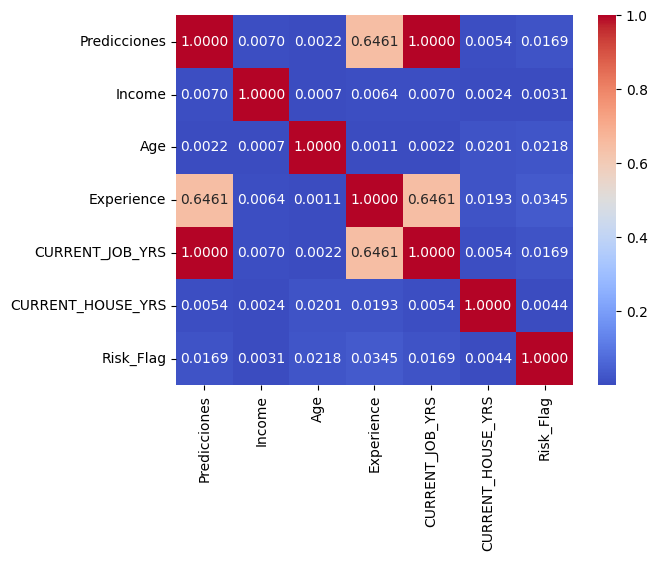

In [ ]:
#Correlación entre todas las variables dentro del frame
Corr_Factors = df.corr()
Corr_Factors

#Encontramos el valor absoluto de todas las correlaciones de los coeficientes de correlación
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

#Mapa de calor de los coeficiente de correlación con el valor
Heat_Map = sns.heatmap(Corr_Factors1, cmap = "coolwarm", annot=True, fmt=".4f")
Heat_Map

##Variable: **Income**

Analizando el mapa de calor podemos observar que las variables que presentan más correlación con "Income" son CURRENT_JOB_YRS y Experience, por lo que utilizaremos ambas para crear un modelo de regresión lineal múltiple.

In [ ]:
#Definimoss las variables
vars_indep = df[["CURRENT_JOB_YRS","Experience"]] #Siempre lleva doble corchete, porque es una lista
var_dep = df["Income"] #Unicamente lleva unos corchetes porque solo puede ser una variable

#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo
model = LinearRegression()

#Ajustamos el modelo con las variables previamente declaradas
model.fit(X=vars_indep,y=var_dep) #X debe de ir en mayúsculas porque es una matriz

#Verificamos los coeficientes obtenidos
model.__dict__ #diccionario del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CURRENT_JOB_YRS', 'Experience'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([3922.76017175, 1539.35024741]),
 'rank_': 2,
 'singular_': array([3284.54172641, 1281.95967162]),
 'intercept_': 4956746.905125832}

###**Modelo matemático: y = 3922.76017175x1 + 1539.35024741x2 +4956746.905125832**
- x1: CURRENT_JOB_YRS
- x2: Experience

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter = model.score(X=vars_indep, y=var_dep)
coef_Deter

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

5.5629863921491385e-05

In [ ]:
#Coeficiente de correlación de nuestro modelo(R^2)
coef_Correl = np.sqrt(coef_Deter)
coef_Correl #El modelo presenta una correlación alta positiva

0.007458543015997922

- **Análisis de modelo**

El coeficiente de correlación del modelo de regresión lineal múltiple generado aumento ligeramente, siendo de 0.0074, en comparación del coefeciente de correlación más alto que fue del 0.007. Ambos valores son extremadamente bajos, pero lo que se busca analisar y comprobar si incrementa al hacer un modelo lineal múltiple y en este caso sse mejoró

##Variable: **Age**

Analizando el mapa de calor podemos observar que las variables que presentan más correlación con "Age" son CURRENT_HOUSE_YRS y Risk_Flag, por lo que utilizaremos ambas para crear un modelo de regresión lineal múltiple.

In [ ]:
#Definimoss las variables
vars_indep2 = df[["CURRENT_HOUSE_YRS","Risk_Flag"]] #Siempre lleva doble corchete, porque es una lista
var_dep2 = df["Age"] #Unicamente lleva unos corchetes porque solo puede ser una variable

#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo
model2 = LinearRegression()

#Ajustamos el modelo con las variables previamente declaradas
model2.fit(X=vars_indep2,y=var_dep2) #X debe de ir en mayúsculas porque es una matriz

#Verificamos los coeficientes obtenidos
model2.__dict__ #diccionario del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CURRENT_HOUSE_YRS', 'Risk_Flag'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.2467444 , -1.13769054]),
 'rank_': 2,
 'singular_': array([702.30999136, 164.87250014]),
 'intercept_': 53.05439573135235}

###**Modelo matemático: y = -0.2467444x1 -1.13769054x2 +53.05439573135235**
- x1: CURRENT_HOUSE_YRS
- x2: Risk_Flag

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter2 = model2.score(X=vars_indep2, y=var_dep2)
coef_Deter2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.000884896120526113

In [ ]:
#Coeficiente de correlación de nuestro modelo(R^2)
coef_Correl2 = np.sqrt(coef_Deter2)
coef_Correl2 #El modelo presenta una correlación alta positiva

0.029747203574892765

- **Análisis de modelo**

El coeficiente de correlación del modelo de regresión lineal múltiple generado aumentó 0.0079 en comparación del coefeciente de correlación más alto, siendo este de 0.0297.  Ambos valores son extremadamente bajos, pero lo que se busca analisar y comprobar si incrementa al hacer un modelo lineal múltiple y en este caso si se mejoró.

##Variable: **Experience**

Analizando el mapa de calor podemos observar que "Experience" presenta una correlación media/alta con CURRENT_JOB_YRS, siendo la más alta entre todas las variables de tipo numércias del dataframe, con un valor de 0.646. Para el modelo linea múltiple contemplaremos esta variable, al igual que las variables: "CURRENT_HOUSE_YRS" y "Risk_flag", las cuales presentan correlaciones bajas pero podrían ayudar a conseguir un mejor modelo.

In [ ]:
#Definimoss las variables
vars_indep3 = df[["CURRENT_JOB_YRS","CURRENT_HOUSE_YRS","Risk_Flag"]] #Siempre lleva doble corchete, porque es una lista
var_dep3 = df["Experience"] #Unicamente lleva unos corchetes porque solo puede ser una variable

#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo
model3 = LinearRegression()

#Ajustamos el modelo con las variables previamente declaradas
model3.fit(X=vars_indep3,y=var_dep3) #X debe de ir en mayúsculas porque es una matriz

#Verificamos los coeficientes obtenidos
model3.__dict__ #diccionario del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 1.06260028,  0.06752352, -0.42978313]),
 'rank_': 3,
 'singular_': array([1830.80915137,  702.29809232,  164.84871321]),
 'intercept_': 2.5967870708885386}

###**Modelo matemático: y = 1.06260028x1 + 0.06752352x2 -0.42978313 + 2.5967870708885386**
- x1: CURRENT_JOB_YRS
- x2: CURRENT_HOUSE_YRS
- x3: Risk_Flag

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter3 = model3.score(X=vars_indep3, y=var_dep3)
coef_Deter3

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.4182456900238085

In [ ]:
#Coeficiente de correlación de nuestro modelo(R^2)
coef_Correl3 = np.sqrt(coef_Deter3)
coef_Correl3 #El modelo presenta una correlación alta positiva

0.6467191740035303

- **Análisis de modelo**

El coeficiente de correlación del modelo de regresión lineal múltiple generado experimentó un leve aumento, alcanzando un valor de 0.6467, en comparación con el coeficiente de correlación más alto previamente registrado, que se situaba en 0.6461. Aunque ambos valores son sumamente bajos, el objetivo de este análisis es determinar si hay un incremento al emplear un modelo lineal múltiple y, en este caso, se observó una ligera mejora.

##Variable: **CURRENT_JOB_YRS**
Las variables "CURRENT_JOB_YRS" y "Experience" son las que presentan mayor correlación dentro del dataframe, siendo esta de 0.64. Por lo que para el modelo utilizaremos la variable "Expereince", al igual que la variable "Risk_flag", que es la segunda con más correlación con la variable "CURRENT_JOB_YRS".

In [ ]:
#Definimoss las variables
vars_indep4 = df[["Experience","Risk_Flag"]] #Siempre lleva doble corchete, porque es una lista
var_dep4 = df["CURRENT_JOB_YRS"] #Unicamente lleva unos corchetes porque solo puede ser una variable

#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo
model4 = LinearRegression()

#Ajustamos el modelo con las variables previamente declaradas
model4.fit(X=vars_indep4,y=var_dep4) #X debe de ir en mayúsculas porque es una matriz

#Verificamos los coeficientes obtenidos
model4.__dict__ #diccionario del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Experience', 'Risk_Flag'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.3926685 , 0.05962746]),
 'rank_': 2,
 'singular_': array([3013.27560219,  164.77559665]),
 'intercept_': 2.3667022068255905}

###**Modelo matemático: y = 0.3926685x1 + 0.05962746x2 + 2.3667022068255905**
- x1: Experience
- x2: Risk_Flag

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter4 = model4.score(X=vars_indep4, y=var_dep4)
coef_Deter4

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.4174708015227476

In [ ]:
#Coeficiente de correlación de nuestro modelo(R^2)
coef_Correl4 = np.sqrt(coef_Deter4)
coef_Correl4 #El modelo presenta una correlación alta positiva

0.6461198043108938

- **Análisis de modelo**

El coeficiente de correlación del modelo de regresión lineal múltiple generado experimentó un incremento muy leve, alcanzando un valor de 0.64611, en comparación con el coeficiente de correlación más alto previamente registrado, que se situaba en 0.64610. Estos valores son sumamanete similares, dado que la otra variable independiente incorporada en el modelo presentaba una correlación muy baja, lo que limitó su impacto en el resultado. No obstante, se observó una mejora mínima en el coeficiente, aunque prácticamente insignificante.

##Variable: **CURRENT_HOUSE_YRS**

Analizando el mapa de calor podemos observar que las variables que presentan más correlación con "CURRENT_HOUSE_YRS" son "Age", "Experience" y "CURRENT_JOB_YRS", por lo que utilizaremos esas tres para crear un modelo de regresión lineal múltiple.

In [ ]:
#Definimoss las variables
vars_indep5 = df[["Age","Experience","CURRENT_JOB_YRS"]] #Siempre lleva doble corchete, porque es una lista
var_dep5 = df["CURRENT_HOUSE_YRS"] #Unicamente lleva unos corchetes porque solo puede ser una variable

#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo
model5 = LinearRegression()

#Ajustamos el modelo con las variables previamente declaradas
model5.fit(X=vars_indep5,y=var_dep5) #X debe de ir en mayúsculas porque es una matriz

#Verificamos los coeficientes obtenidos
model5.__dict__ #diccionario del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience', 'CURRENT_JOB_YRS'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.00164616,  0.00631643, -0.00463972]),
 'rank_': 3,
 'singular_': array([8565.97176066, 3284.54140955, 1281.94964779]),
 'intercept_': 12.045715902117509}

###**Modelo matemático: y = -0.00164616x1 + 0.00631643x2 - 0.00463972 + 12.045715902117509**

- x1: Age
- x2: Experience
- x2: CURRENT_JOB_YRS

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter5 = model5.score(X=vars_indep5, y=var_dep5)
coef_Deter5

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.0008625690439809652

In [ ]:
#Coeficiente de correlación de nuestro modelo(R^2)
coef_Correl5 = np.sqrt(coef_Deter5)
coef_Correl5 #El modelo presenta una correlación alta positiva

0.02936952577044725

- **Análisis de modelo**

El coeficiente de correlación del modelo de regresión lineal múltiple generado experimentó un aumento leve, alcanzando un valor de 0.0293, en contraste con el coeficiente de correlación más alto previamente registrado, que se situaba en 0.0193. A pesar de que ambos valores son sumamente bajos, el objetivo de este análisis es evaluar si la implementación de un modelo lineal múltiple resulta en un incremento de la correlación. En este caso, se observó una mejora marginal en la correlación.

##Variable: **Risk_Flag**

Analizando el mapa de calor podemos observar que las variables que presentan más correlación con "Risk_Flag" son "Age" y "Experience", por lo que utilizaremos ambas para crear un modelo de regresión lineal múltiple.

In [ ]:
#Definimoss las variables
vars_indep6 = df[["Age","Experience"]] #Siempre lleva doble corchete, porque es una lista
var_dep6 = df["Risk_Flag"] #Unicamente lleva unos corchetes porque solo puede ser una variable

#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo
model6 = LinearRegression()

#Ajustamos el modelo con las variables previamente declaradas
model6.fit(X=vars_indep6,y=var_dep6) #X debe de ir en mayúsculas porque es una matriz

#Verificamos los coeficientes obtenidos
model6.__dict__ #diccionario del modelo

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Age', 'Experience'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([-0.00042052, -0.00189028]),
 'rank_': 2,
 'singular_': array([8565.97089468, 3013.26806212]),
 'intercept_': 0.16306900612184838}

###**Modelo matemático: y = -0.00042052x1 - 0.00189028x2 + 0.16306900612184838**

- x1: Age
- x2: Experience

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_Deter6 = model6.score(X=vars_indep6, y=var_dep6)
coef_Deter6

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.0016691405358413292

In [ ]:
#Coeficiente de correlación de nuestro modelo(R^2)
coef_Correl6 = np.sqrt(coef_Deter6)
coef_Correl6 #El modelo presenta una correlación alta positiva

0.04085511639735382

- **Análisis de modelo**

El coeficiente de correlación del modelo de regresión lineal múltiple generado experimentó un ligero aumento, alcanzando un valor de 0.0408, en contraste con el coeficiente de correlación más alto registrado previamente, que se situaba en 0.0345. A pesar de que ambos valores son notablemente bajos, el objetivo de este análisis consiste en verificar si la aplicación de un modelo lineal múltiple resulta en una mejora en dicho coeficiente. En este caso, se pudo observar una leve mejora en la correlación.

##**Conclusión**

En los modelos de regresión lineal múltiple que incluyeron al menos dos variables independientes, se observó consistentemente un coeficiente de correlación superior en comparación con el valor más alto registrado en el mapa de calor de las variables del conjunto de datos. Aunque en todos los casos esta mejora fue mínima, esto se debió a que las variables utilizadas mostraban correlaciones extremadamente bajas entre sí, lo que limitaba su impacto en el modelo. En resumen, podemos concluir que los modelos de regresión lineal múltiple siempre arrojaron un coeficiente de correlación superior.

#**Modelos de regression NO lineal para cada variable cuantitativa**
- (Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS y Risk_Flag), y comparar los coeficientes obtenidos con respecto a los coeficientes obtenidos en los modelos lineales, generar un análisis comparativo a través de una gráfica.

In [ ]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

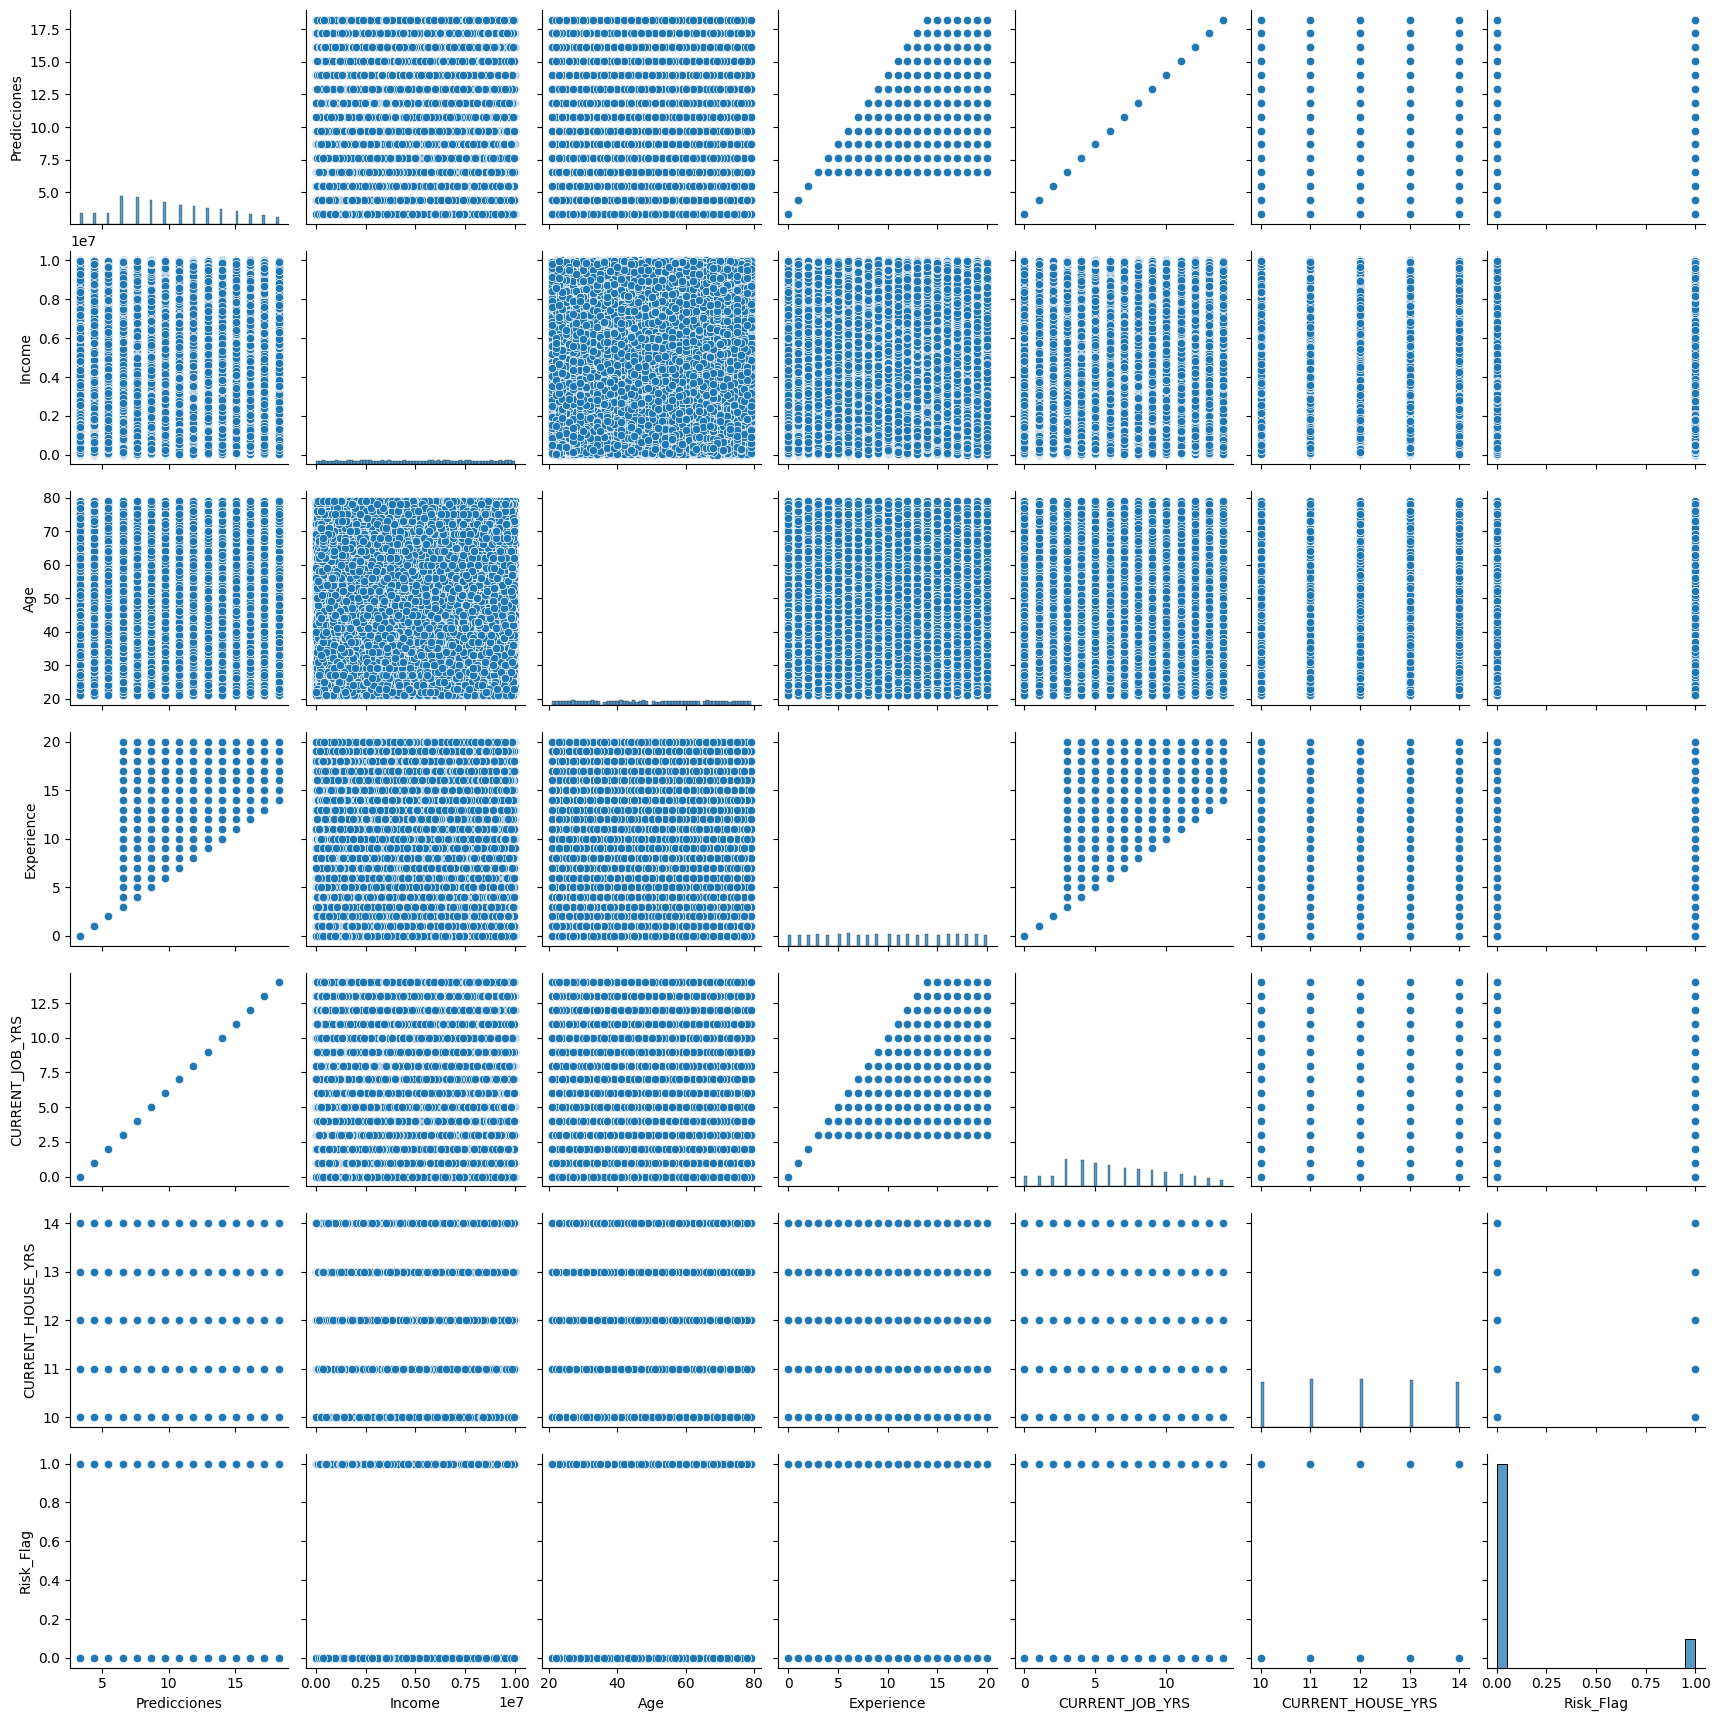

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

##Variable: **Income**

###Variable: **Income** vs **Age**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Age']]
Var_Dep= df['Income']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

In [ ]:
def  func1 (x, a, b, c):
     return (a*x**11 + b)/ c*x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['Age'], df['Income'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.03301932e-12, 7.76552259e+07, 8.53429688e+02])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['Age'], df['Income'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**11 + b)/ c*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,Age
Id,
1,2.092841e+06
2,3.659985e+06
3,5.432649e+06
4,3.757981e+06
5,4.417263e+06
...,...
251996,3.961022e+06
251997,2.365906e+06
251998,4.294281e+06


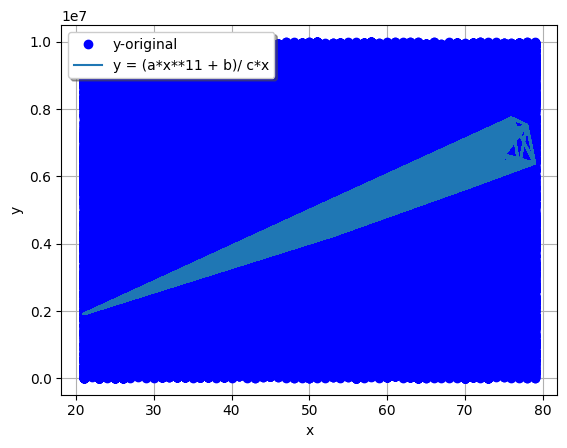

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**11 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.3027630915130417

In [ ]:
core=np.sqrt(R2)
core

0.5502391221215025

- **Análisis de modelo**

++++++

###Variable: **Income** vs **Experience**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Experience']]
Var_Dep= df['Income']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = 1/a*x    ("Función inversa")

In [ ]:
def  func1 (x, a):
     return 1/a*x

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['Experience'], df['Income'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([2.72704447e-06])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['Experience'], df['Income'])
a = parametros[ 0 ]
yfit1 = 1/a*x

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,Experience
Id,
1,1.100092e+06
2,3.666974e+06
3,1.466789e+06
4,7.333947e+05
5,4.033671e+06
...,...
251996,4.767066e+06
251997,3.666974e+06
251998,2.566882e+06


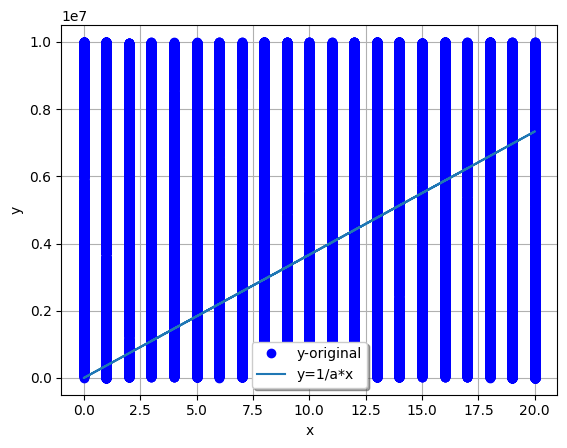

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

0.7787267413363248

In [ ]:
core=np.sqrt(R2)
core

0.8824549514486985

- **Análisis de modelo**

++++++

###Variable: **Income** vs **CURRENT_JOB_YRS**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_JOB_YRS']]
Var_Dep= df['Income']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c   ("Función cuadrática")

In [ ]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['CURRENT_JOB_YRS'], df['Income'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 2.66943200e+03, -3.09152125e+04,  5.05033159e+06])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['Experience'], df['Income'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2 + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,CURRENT_JOB_YRS
Id,
1,4.970410e+06
2,5.006331e+06
3,4.978193e+06
4,4.961908e+06
5,4.970410e+06
...,...
251996,4.991604e+06
251997,4.991604e+06
251998,4.997232e+06


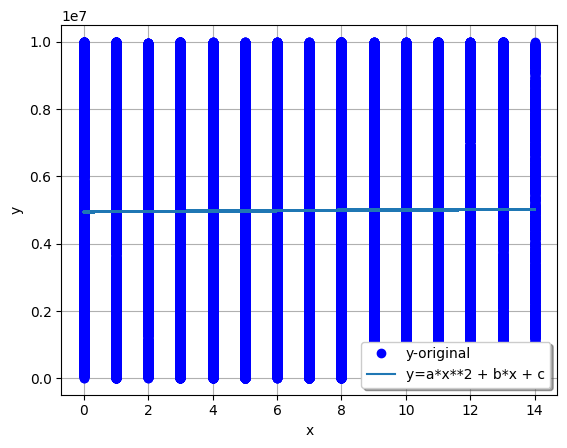

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x**2 + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

8.617181872061508e-06

In [ ]:
core=np.sqrt(R2)
core

0.002935503682856063

- **Análisis de modelo**

++++++

##Variable: **Age**

###Variable: **Age** vs **CURRENT_JOB_YRS**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_JOB_YRS']]
Var_Dep= df['Age']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = a*np.sin(x) + b ("Función senoidal")

In [ ]:
def  func1 (x, a, b):
     return a*np.sin(x) + b

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 0.1120773 , 49.95694342])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])
a, b= parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.sin(x) + b

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,CURRENT_JOB_YRS
Id,
1,49.972760
2,50.003133
3,49.872123
4,50.058855
5,49.972760
...,...
251996,49.925627
251997,49.925627
251998,50.030577


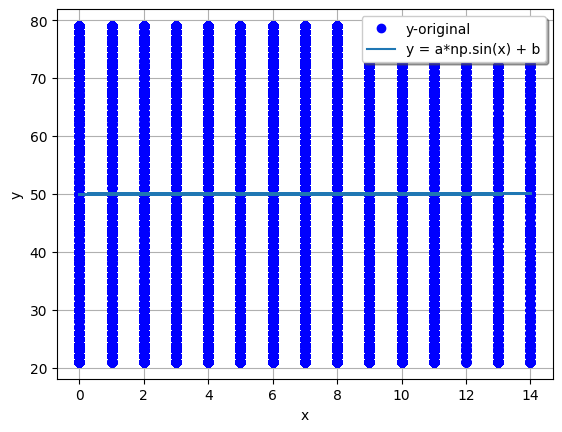

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = a*np.sin(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

2.030510408246311e-05

In [ ]:
core=np.sqrt(R2)
core

0.004506118516246894

- **Análisis de modelo**

++++++

###Variable: **Age** vs **CURRENT_HOUSE_YRS**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_HOUSE_YRS']]
Var_Dep= df['Age']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = a*np.tan(x) + b ("Función tangencial")

In [ ]:
def  func1 (x, a, b):
     return a*np.tan(x) + b

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['CURRENT_HOUSE_YRS'], df['Age'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-8.56574094e-06,  4.99536863e+01])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])
a, b= parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,CURRENT_HOUSE_YRS
Id,
1,49.938915
2,49.938915
3,49.938702
4,49.940180
5,49.931110
...,...
251996,50.199493
251997,50.199493
251998,49.940180


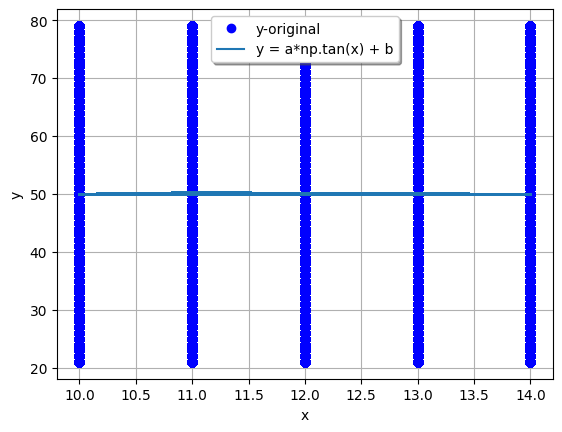

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

4.2809800045340296e-05

In [ ]:
core=np.sqrt(R2)
core

0.006542919840968579

- **Análisis de modelo**

++++++

###Variable: **Age** vs **Risk_Flag**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Risk_Flag']]
Var_Dep= df['Age']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [ ]:
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['Risk_Flag'], df['Age'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 224.4899058 , -225.62299783,   50.09344175])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])
a, b, c= parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,Risk_Flag
Id,
1,49.890228
2,49.890228
3,49.890228
4,49.900308
5,49.900308
...,...
251996,49.890228
251997,49.890228
251998,49.890228


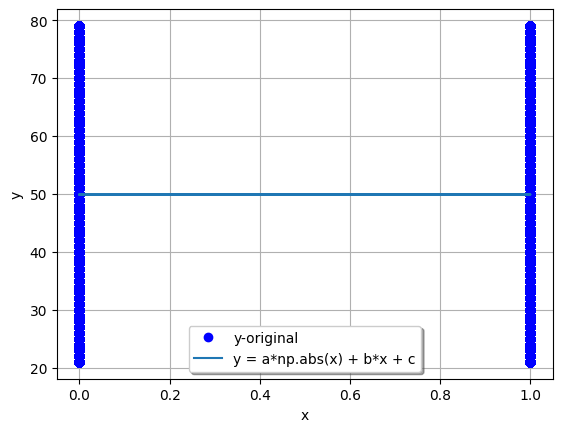

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

2.1959936756354992e-05

In [ ]:
core=np.sqrt(R2)
core

0.004686143057606649

- **Análisis de modelo**

++++++

##Variable: **Experience**

###Variable: **Age** vs **CURRENT_JOB_YRS**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_JOB_YRS']]
Var_Dep= df['Age']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = a*np.sin(x) + b ("Función senoidal")

In [ ]:
def  func1 (x, a, b):
     return a*np.sin(x) + b

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 0.1120773 , 49.95694342])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])
a, b= parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.sin(x) + b

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,CURRENT_JOB_YRS
Id,
1,49.972760
2,50.003133
3,49.872123
4,50.058855
5,49.972760
...,...
251996,49.925627
251997,49.925627
251998,50.030577


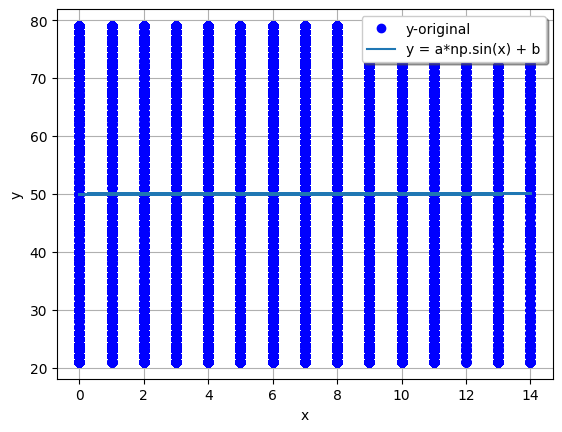

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = a*np.sin(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

2.030510408246311e-05

In [ ]:
core=np.sqrt(R2)
core

0.004506118516246894

- **Análisis de modelo**

++++++

###Variable: **Age** vs **CURRENT_HOUSE_YRS**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['CURRENT_HOUSE_YRS']]
Var_Dep= df['Age']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = a*np.tan(x) + b ("Función tangencial")

In [ ]:
def  func1 (x, a, b):
     return a*np.tan(x) + b

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['CURRENT_HOUSE_YRS'], df['Age'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-8.56574094e-06,  4.99536863e+01])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])
a, b= parametros[ 0 ], parametros[ 1 ]
yfit1 = a*np.tan(x) + b

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,CURRENT_HOUSE_YRS
Id,
1,49.938915
2,49.938915
3,49.938702
4,49.940180
5,49.931110
...,...
251996,50.199493
251997,50.199493
251998,49.940180


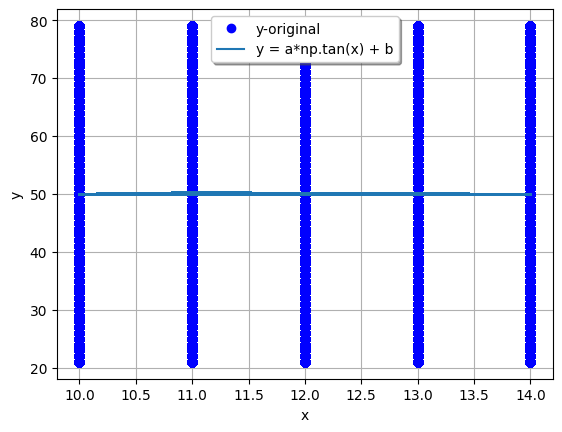

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = a*np.tan(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

4.2809800045340296e-05

In [ ]:
core=np.sqrt(R2)
core

0.006542919840968579

- **Análisis de modelo**

++++++

###Variable: **Age** vs **Risk_Flag**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['Risk_Flag']]
Var_Dep= df['Age']

In [ ]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

In [ ]:
def  func1 (x, a, b, c):
     return a*np.abs(x) + b*x + c

In [ ]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['Risk_Flag'], df['Age'])

In [ ]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 224.4899058 , -225.62299783,   50.09344175])

In [ ]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['CURRENT_JOB_YRS'], df['Age'])
a, b, c= parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*np.abs(x) + b*x + c

In [ ]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,Risk_Flag
Id,
1,49.890228
2,49.890228
3,49.890228
4,49.900308
5,49.900308
...,...
251996,49.890228
251997,49.890228
251998,49.890228


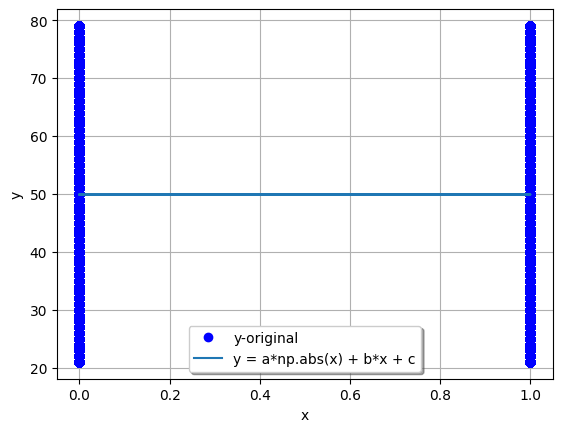

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo

R2 = abs(r2_score(y, yfit1))
R2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

2.1959936756354992e-05

In [ ]:
core=np.sqrt(R2)
core

0.004686143057606649

- **Análisis de modelo**

++++++

##**Conclusión**

xxxxxxxxxx